/project/hnguyen/hqvo2/miniconda3/envs/multimedal/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


input emb & pos emb shape: torch.Size([3, 9, 512]) torch.Size([1, 9, 512]) position ids shape: torch.Size([1, 77])



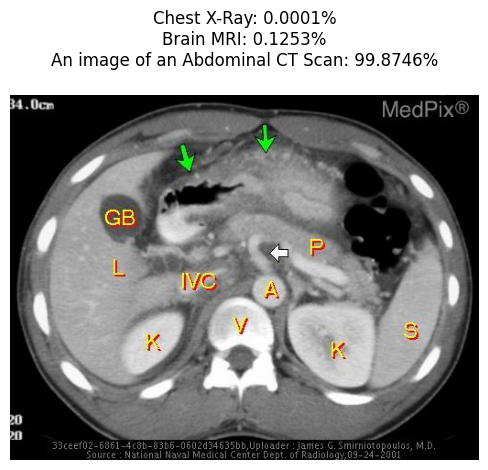

In [1]:
import requests
from PIL import Image
import matplotlib.pyplot as plt

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("flaviagiammarino/pubmed-clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("flaviagiammarino/pubmed-clip-vit-base-patch32")

url = "https://huggingface.co/flaviagiammarino/pubmed-clip-vit-base-patch32/resolve/main/scripts/input.jpeg"
image = Image.open(requests.get(url, stream=True).raw)
text = ["Chest X-Ray", "Brain MRI", "An image of an Abdominal CT Scan"]

inputs = processor(text=text, images=image, return_tensors="pt", padding=True)
probs = model(**inputs).logits_per_image.softmax(dim=1).squeeze()

plt.subplots()
plt.imshow(image)
plt.title("".join([x[0] + ": " + x[1] + "\n" for x in zip(text, [format(prob, ".4%") for prob in probs])]))
plt.axis("off")
plt.tight_layout()
plt.show()


In [2]:
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

In [3]:
import torch
torch.tensor(processor.image_processor(image)['pixel_values']).shape

/scratch/108843/ipykernel_2327691/4179494318.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541702/work/torch/csrc/utils/tensor_new.cpp:230.)
  torch.tensor(processor.image_processor(image)['pixel_values']).shape


torch.Size([1, 3, 224, 224])

In [4]:
processor.tokenizer.model_max_length

1000000000000000019884624838656

In [5]:
processor.tokenizer(text, return_tensors="pt", padding=True)

{'input_ids': tensor([[49406, 10563,   343,   268,  3077, 49407, 49407, 49407, 49407],
        [49406,  4812, 24773, 49407, 49407, 49407, 49407, 49407, 49407],
        [49406,   550,  2867,   539,   550, 39328,  1122, 11261, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [6]:
[name for name, _ in model.named_children()]

['text_model', 'vision_model', 'visual_projection', 'text_projection']

In [3]:
model.text_projection

Linear(in_features=512, out_features=512, bias=False)

In [4]:
model.visual_projection

Linear(in_features=768, out_features=512, bias=False)

# Get Text Features

In [7]:
inputs['input_ids']

tensor([[49406, 10563,   343,   268,  3077, 49407, 49407, 49407, 49407],
        [49406,  4812, 24773, 49407, 49407, 49407, 49407, 49407, 49407],
        [49406,   550,  2867,   539,   550, 39328,  1122, 11261, 49407]])

In [8]:
model.text_model(inputs['input_ids']).keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [9]:
model.text_model.forward(inputs['input_ids']).keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [10]:
inputs

{'input_ids': tensor([[49406, 10563,   343,   268,  3077, 49407, 49407, 49407, 49407],
        [49406,  4812, 24773, 49407, 49407, 49407, 49407, 49407, 49407],
        [49406,   550,  2867,   539,   550, 39328,  1122, 11261, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7777],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7631, -1.7777, -1.7777],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7631, -1.7777, -1.7777],
          ...,
          [-1.7777, -1.7777, -1.7777,  ..., -1.7777, -1.7777, -1.7777],
          [-1.7777, -1.7777, -1.7777,  ..., -1.7777, -1.7777, -1.7777],
          [-1.7777, -1.7777, -1.7777,  ..., -1.7777, -1.7777, -1.7777]],

         [[-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7371],
          [-1.7521, -1.7521, -1.7521,  ..., -1.7221, -1.7371, -1.7371],
          [-1.7521, -1.75

In [11]:
inputs['input_ids'].size()

torch.Size([3, 9])

In [12]:
model.text_model.forward(inputs['input_ids'])['last_hidden_state'].shape

torch.Size([3, 9, 512])

In [13]:
model.text_model.forward(inputs['input_ids'])['pooler_output'].shape

torch.Size([3, 512])

# Get Image Features

In [19]:
type(inputs['pixel_values'])

torch.Tensor

In [15]:
model.vision_model.forward(inputs['pixel_values']).keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [16]:
model.vision_model(inputs['pixel_values'])['last_hidden_state'].shape

torch.Size([1, 50, 768])

In [17]:
model.vision_model.forward(inputs['pixel_values'])['pooler_output'].shape

torch.Size([1, 768])

In [18]:
inputs['pixel_values'].shape

torch.Size([1, 3, 224, 224])